In this code i perfed K-Means clustering on a credit card transaction dataset to detect fraud. Here, the code tries to form two clusters: one for fraudulent transactions and another for non-fraudulent transactions.

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/SGP/creditcard.csv')

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values  # Labels (the last column)

In [ ]:
# Check for missing values
missing_values_count = np.sum(pd.isnull(X))

In [ ]:
# Handle missing values with KNN Imputer, if any
if missing_values_count > 0:
    knn_imputer = KNNImputer(n_neighbors=5)
    X_imputed = knn_imputer.fit_transform(X)
else:
    X_imputed = X

In [ ]:
# Standardize features using RobustScaler to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Remove outliers using Z-score (threshold = 3)
X_cleaned = X_scaled[(np.abs(zscore(X_scaled)) < 3).all(axis=1)]

In [ ]:
# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_reduced = umap_reducer.fit_transform(X_cleaned)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=50, random_state=42, init='k-means++')
cluster_labels = kmeans.fit_predict(X_reduced)

In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_reduced, cluster_labels)
print(f"Silhouette Score with 2 clusters: {silhouette_avg:.3f}")

Silhouette Score with 2 clusters: 0.313


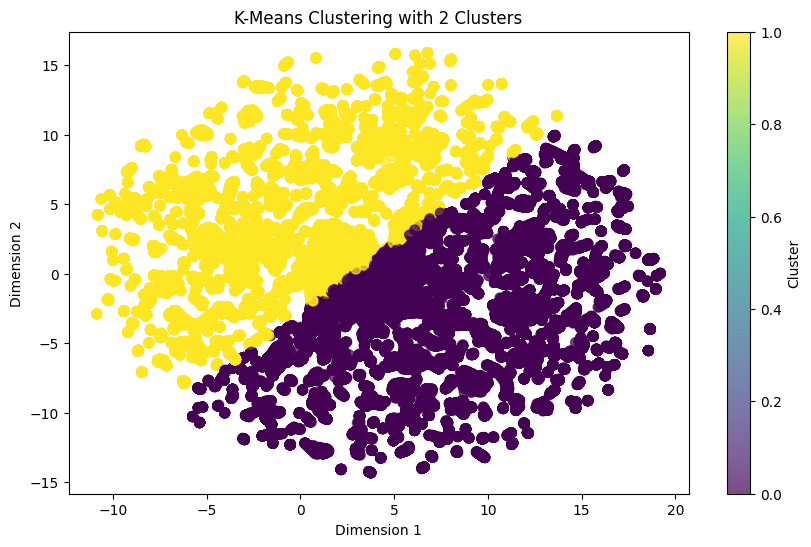

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7, s=50)
plt.title('K-Means Clustering with 2 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(scatter, label='Cluster')
plt.show()